# Regressão Linear Múltipla
---

## Q1. Previsão do Saldo Médio do Cartão de Crédito

<img src="https://selecao-stg.letscode.com.br/favicon.png" style="position: absolute; top: 0.75rem; right: 2rem; width: 50px" />

Neste case, você deverá aplicar a regressão linear múltipla para estimar o saldo médido do cartão de crédito de clientes de um banco, a partir das demais informações contidas no conjunto de dados (`credit_regression.csv`), os quais são descritos abaixo. Aplique a regressão linear, utilizando o `LinearRegression` do `sklearn` e, também, o `OLS` do `statsmodels`.

* ID - Identificação
* Income - Renda
* Limit - Limite de crédito
* Rating - Score do Serasa
* Age - Idade
* Education - Anos de educação
* Gender - Gênero
* Student - É estudante? (Sim ou Não)
* Married - É casado(a)? (Sim ou Não)
* Ethnicity - Afro-americano, asiático ou branco
* Balance - Saldo médio do cartão de crédito em dólares

> [Link para o download do dataset](https://s3-sa-east-1.amazonaws.com/lcpi/ab0a9e91-89d1-4897-b384-51a86c50b804.csv)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

# Bibliotecas para RL
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

sns.set()
pio.templates.default = 'plotly_dark'

In [46]:
df = pd.read_csv('cartoes_completo.csv')
df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  400 non-null    int64  
 1   Income      400 non-null    float64
 2   Limit       400 non-null    int64  
 3   Rating      400 non-null    int64  
 4   Cards       400 non-null    int64  
 5   Age         400 non-null    int64  
 6   Education   400 non-null    int64  
 7   Gender      400 non-null    object 
 8   Student     400 non-null    object 
 9   Married     400 non-null    object 
 10  Ethnicity   400 non-null    object 
 11  Balance     400 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,400.0,200.500000,115.614301,1.000,100.75000,200.5000,300.25000,400.000
Income,400.0,45.218885,35.244273,10.354,21.00725,33.1155,57.47075,186.634
Limit,400.0,4735.600000,2308.198848,855.000,3088.00000,4622.5000,5872.75000,13913.000
Rating,400.0,354.940000,154.724143,93.000,247.25000,344.0000,437.25000,982.000
Cards,400.0,2.957500,1.371275,1.000,2.00000,3.0000,4.00000,9.000
Age,400.0,55.667500,17.249807,23.000,41.75000,56.0000,70.00000,98.000
Education,400.0,13.450000,3.125207,5.000,11.00000,14.0000,16.00000,20.000
Balance,400.0,520.015000,459.758877,0.000,68.75000,459.5000,863.00000,1999.000


Já conseguimos ver que algumas variáveis apresentam ouliers que talvez tenham que ser removidos no futuro.

<h1>Análise Exploratória dos dados</h1>

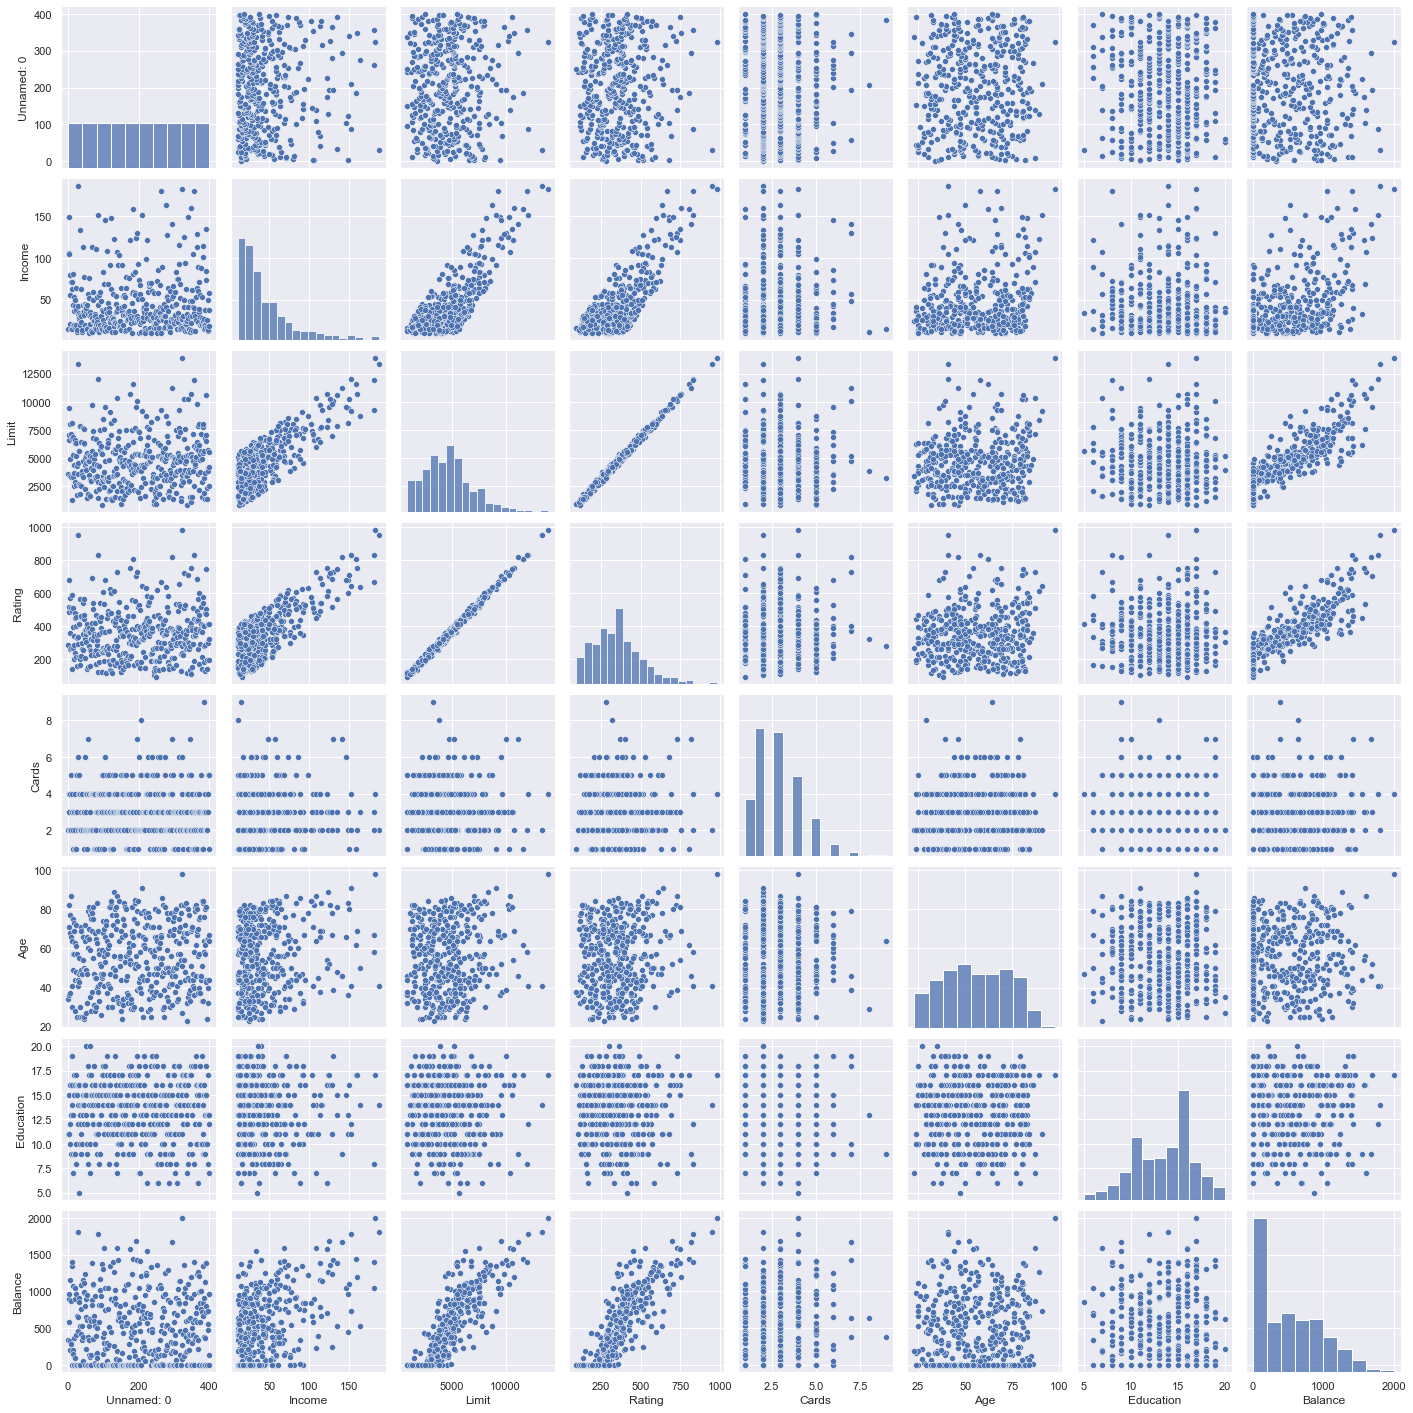

In [49]:
sns.pairplot(df)

Percebemos apenas algumas poucas variáveis apresentam alguma correlação importante e que essas correlações são lineares.

<AxesSubplot:>

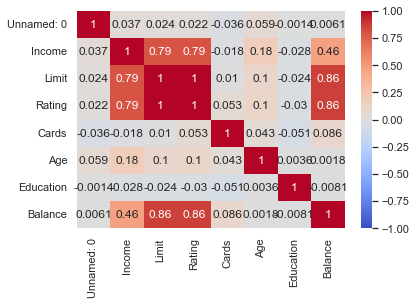

In [50]:
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)

Já podemos ver que muitas variáveis não apresentam nenhuma correlação com a variável de estudo, e que elas provavelmente terão ter que ser removidas do modelo.

<h1>Primeiro Modelo</h1>

In [51]:
#Fazendo a transformação das variáveis categóricas
df = pd.get_dummies(df, drop_first = True)
df

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,1,14.891,3606,283,2,34,11,333,0,0,1,0,1
1,2,106.025,6645,483,3,82,15,903,1,1,1,1,0
2,3,104.593,7075,514,4,71,11,580,0,0,0,1,0
3,4,148.924,9504,681,3,36,11,964,1,0,0,1,0
4,5,55.882,4897,357,2,68,16,331,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,560,0,0,1,0,1
396,397,13.364,3838,296,5,65,17,480,0,0,0,0,0
397,398,57.872,4171,321,5,67,12,138,1,0,1,0,1
398,399,37.728,2525,192,1,44,13,0,0,0,1,0,1


In [52]:
x = df.drop(['Unnamed: 0', 'Limit'], axis=1)
y = df['Limit']

In [53]:
#Criando o modelo
lr_initial = LinearRegression()
lr_initial.fit(x, y)

LinearRegression()

In [54]:
#Imprimindo o Coeficiente
pd.DataFrame(lr_initial.coef_, index=x.columns, columns=['Coef'])

,Coef
Income,3.423387
Rating,13.213478
Cards,-73.742328
Age,0.125169
Education,3.926204
Balance,0.421123
Gender_Female,4.210253
Student_Yes,-224.137827
Married_Yes,-28.081627
Ethnicity_Asian,16.803359


In [55]:
#Imprimindo o Intercepto Inicial
lr_initial.intercept_

-135.89819202556555

<h1>Avaliando o Primeiro Modelo</h1>

In [56]:
x = sm.add_constant(x)

model_initial = sm.OLS(y, x).fit()

In [57]:
model_initial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     8941.
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:04:51   Log-Likelihood:                -2556.9
No. Observations:                 400   AIC:                             5138.
Df Residuals:                     388   BIC:                             5186.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -135.8982     63.883     -2.127      0.034    -261.499     -10.298
Income                  3.4234      0.661      5.179      0.000       2.124       4.723
Rating                 13.2135      0.298     44.309      0.000      12.627      13.800
Cards                 -73.7423      5.417    -13.614      0.000     -84.392     -63.093
Age                     0.1252      0.439      0.285      0.776      -0.738       0.988
Education               3.9262      2.366      1.659      0.098      -0.726       8.579
Balance                 0.4211      0.072      5.824      0.000       0.279       0.563
Gender_Female           4.2103     14.745      0.286      0.775     -24.780      33.200
Student_Yes          -224.1378     38.961     -5.753      0.000    -300.738    -147.538
Married_Yes           -28.0816     15.339     -1.831      0.068     -58.239       2.076
Ethnicity_Asian        16.8034     20.991      0.801      0.424     -24.467      58.074
Ethnicity_Caucasian    -1.6447     18.150     -0.091      0.928     -37.330      34.041
==============================================================================
Omnibus:                        7.856   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.970
Skew:                          -0.324   Prob(JB):                       0.0186
Kurtosis:                       2.757   Cond. No.                     7.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:ylabel='Count'>

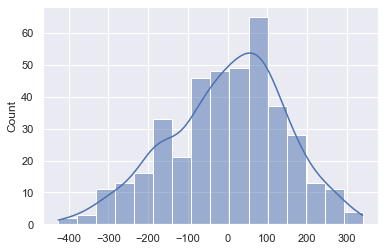

In [58]:
sns.histplot(model_initial.resid, kde=True)

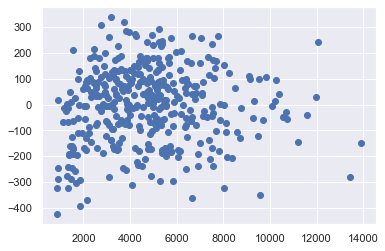

In [59]:
plt.scatter(y, model_initial.resid)

<h1>Segunda Versão do Modelo</h1>

Primeiro vamos remover todas as variáveis que tem um correlação baixa a variável de interesse. Vamos eliminar a variável Etinicidade por motivos éticos também.

In [60]:
df_corr = df[['Income', 'Rating', 'Balance','Limit']]
df

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_Female,Student_Yes,Married_Yes,Ethnicity_Asian,Ethnicity_Caucasian
0,1,14.891,3606,283,2,34,11,333,0,0,1,0,1
1,2,106.025,6645,483,3,82,15,903,1,1,1,1,0
2,3,104.593,7075,514,4,71,11,580,0,0,0,1,0
3,4,148.924,9504,681,3,36,11,964,1,0,0,1,0
4,5,55.882,4897,357,2,68,16,331,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,560,0,0,1,0,1
396,397,13.364,3838,296,5,65,17,480,0,0,0,0,0
397,398,57.872,4171,321,5,67,12,138,1,0,1,0,1
398,399,37.728,2525,192,1,44,13,0,0,0,1,0,1


Vamos procurar remover outliers também

<AxesSubplot:>

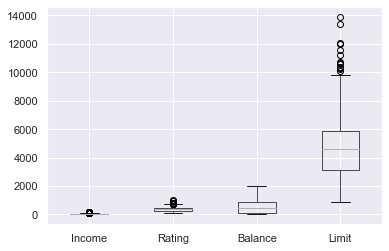

In [61]:
df_corr.boxplot()

In [62]:
def get_inf_sup_limits_outliers(data):
    Q1 = data.quantile(q=0.25)
    Q3 = data.quantile(q=0.75)
    
    IQR = Q3 - Q1
    
    inf = Q1 - 1.5 * IQR
    sup = Q3 + 1.5 * IQR
    
    return inf, sup

In [63]:
df_filtered = df_corr.copy()

for coluna in df_corr.columns:
    inf, sup = get_inf_sup_limits_outliers(df[coluna])
    
    df_filtered = df_filtered[(df_filtered[coluna] >= inf) & (df_filtered[coluna] <= sup)]

In [64]:
df_filtered

,Income,Rating,Balance,Limit
0,14.891,283,333,3606
1,106.025,483,903,6645
2,104.593,514,580,7075
4,55.882,357,331,4897
5,80.180,569,1151,8047
...,...,...,...,...
395,12.096,307,560,4100
396,13.364,296,480,3838
397,57.872,321,138,4171
398,37.728,192,0,2525


Criando o Modelo

In [65]:
x = df_filtered[['Income', 'Rating', 'Balance']]
y = df_filtered[['Limit']]

In [66]:
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

In [67]:
#Imprimindo o Coeficiente
pd.DataFrame(np.reshape(lr.coef_,(3,1)), index = x.columns, columns=['Coef'])

,Coef
Income,2.352806
Rating,14.261630
Balance,0.128882


In [68]:
#Imprimindo o Intercepto Inicial
lr.intercept_

array([-489.64077585])

<h1>Avaliando Modelo</h1>

In [69]:
x = sm.add_constant(x)
model_initial = sm.OLS(y, x).fit()

In [70]:
model_initial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Limit   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.252e+04
Date:                Tue, 15 Feb 2022   Prob (F-statistic):               0.00
Time:                        12:04:56   Log-Likelihood:                -2442.5
No. Observations:                 370   AIC:                             4893.
Df Residuals:                     366   BIC:                             4909.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -489.6408     39.834    -12.292      0.000    -567.973    -411.308
Income         2.3528      0.711      3.308      0.001       0.954       3.751
Rating        14.2616      0.248     57.558      0.000      13.774      14.749
Balance        0.1289      0.058      2.215      0.027       0.014       0.243
==============================================================================
Omnibus:                        5.130   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                4.121
Skew:                          -0.156   Prob(JB):                        0.127
Kurtosis:                       2.588   Cond. No.                     3.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:ylabel='Count'>

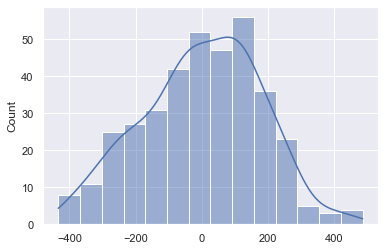

In [71]:
sns.histplot(model_initial.resid, kde=True)

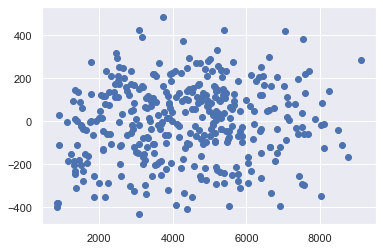

In [72]:
plt.scatter(y, model_initial.resid)

## Treino/Teste
---

1. Processo de treinamento do nosso modelo
2. Processo de teste do nosso modelo

#### Divisão treino-teste

- 70% dos dados para treino
- 30% dos dados para teste

In [73]:
def calc_model_metrics(X, y):
    # 1. Dividir o conjunto de dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    
    # 2. Treinar o modelo
    lr = LinearRegression().fit(X_train, y_train)
    
    print('🏋🏽‍♂️ DADOS DE TREINO 🏋🏽‍♂️')
    # Estimando os dados de treino
    y_est_train = lr.predict(X_train)
    print('MSE:', mean_squared_error(y_train, y_est_train)) # MSE para o treino
    print('RMSE:', np.sqrt(mean_squared_error(y_train, y_est_train))) # RMSE para o treino
    print('R²:', r2_score(y_train, y_est_train)) # R² para o treino
    
    print('\n\n🔥 DADOS DE TESTE 🔥')
    # Estimando os dados de teste
    y_est_test = lr.predict(X_test)
    print('MSE:', mean_squared_error(y_test, y_est_test)) # MSE para o teste
    print('RMSE:', np.sqrt(mean_squared_error(y_test, y_est_test))) # RMSE para o teste
    print('R²:', r2_score(y_test, y_est_test)) # R² para o teste
    
    return lr

In [74]:
calc_model_metrics(x,y)

🏋🏽‍♂️ DADOS DE TREINO 🏋🏽‍♂️
MSE: 28605.85178929986
RMSE: 169.13264554573686
R²: 0.9910595146258045


🔥 DADOS DE TESTE 🔥
MSE: 39137.16477331798
RMSE: 197.83115218114153
R²: 0.9887977293110706


LinearRegression()

## Q2. Estimando o Preço de Venda de Casas

O arquivo `usa_housing.csv` consiste em um dataset que contém informações sobre o preço de casas em determinadas regiões dos Estados Unidos. Uma descrição das colunas desse dataframes é apresentada abaixo:

* `Avg. Area Income`: Média da renda dos residentes de onde a casa está localizada.
* `Avg. Area House Age`: Média de idade das casas da mesma cidade.
* `Avg. Area Number of Rooms`: Número médio de quartos para casas na mesma cidade.
* `Avg. Area Number of Bedrooms`: Número médio de quartos para casas na mesma cidade.
* `Area Population`: A população da cidade onde a casa está localizada.
* `Price`: Preço de venda da casa.
* `Address`: Endereço da casa.

Utilize os dados contidos nele para criar um modelo de regressão linear que seja capaz de estimar o preço de venda das casas.

> [Clique aqui](https://s3-sa-east-1.amazonaws.com/lcpi/7cf57d48-ac3d-4748-9d81-5b4d6677fcff.csv) para fazer o download do dataset.

<h1>Análise Exploratória dos dados</h1>

In [79]:
df_casas = pd.read_csv('usa_housing.csv')
df_casas

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [80]:
df_casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [81]:
df_casas.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Area Income,5000.0,6.858311e+04,10657.991214,17796.631190,61480.562388,6.880429e+04,7.578334e+04,1.077017e+05
Avg. Area House Age,5000.0,5.977222e+00,0.991456,2.644304,5.322283,5.970429e+00,6.650808e+00,9.519088e+00
Avg. Area Number of Rooms,5000.0,6.987792e+00,1.005833,3.236194,6.299250,7.002902e+00,7.665871e+00,1.075959e+01
Avg. Area Number of Bedrooms,5000.0,3.981330e+00,1.234137,2.000000,3.140000,4.050000e+00,4.490000e+00,6.500000e+00
Area Population,5000.0,3.616352e+04,9925.650114,172.610686,29403.928702,3.619941e+04,4.286129e+04,6.962171e+04
Price,5000.0,1.232073e+06,353117.626581,15938.657923,997577.135049,1.232669e+06,1.471210e+06,2.469066e+06


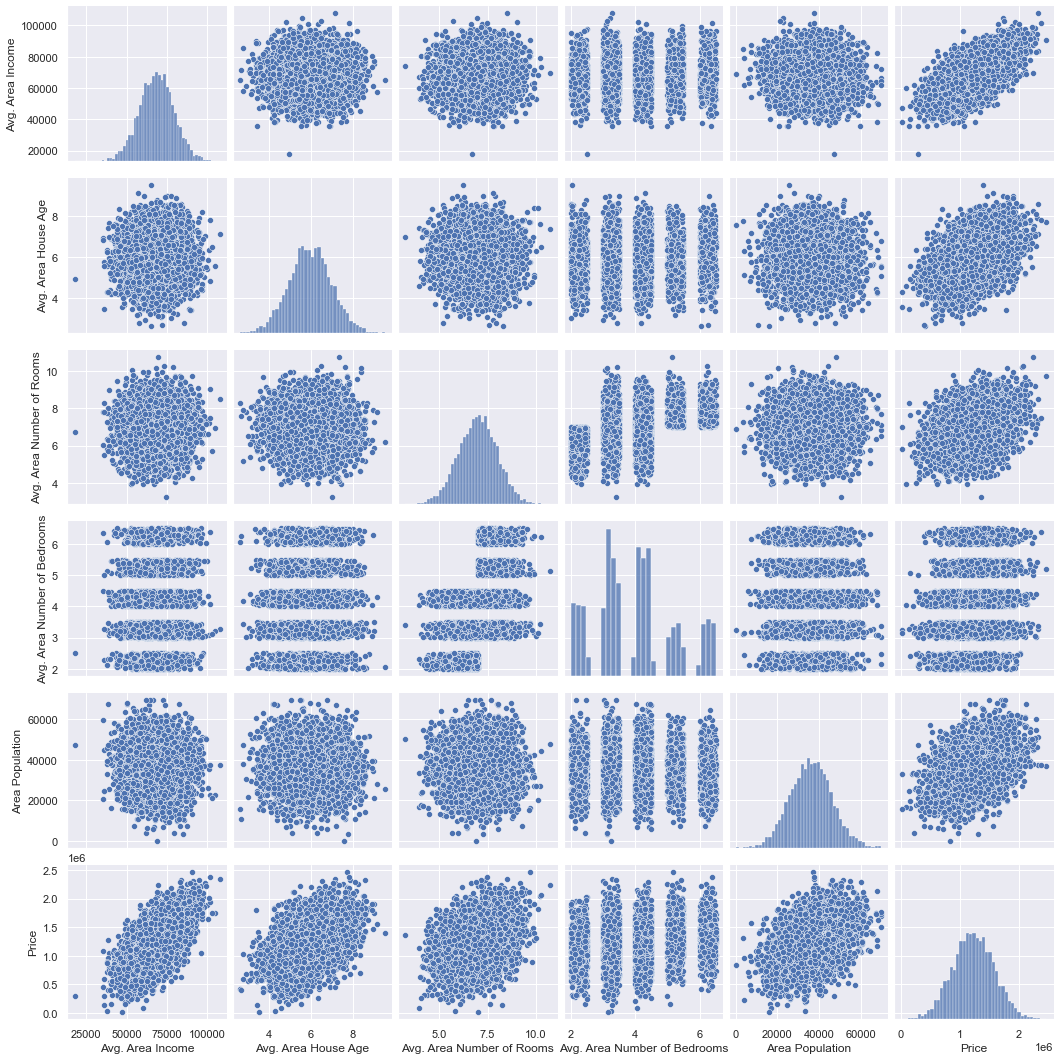

In [82]:
sns.pairplot(df_casas)

<AxesSubplot:>

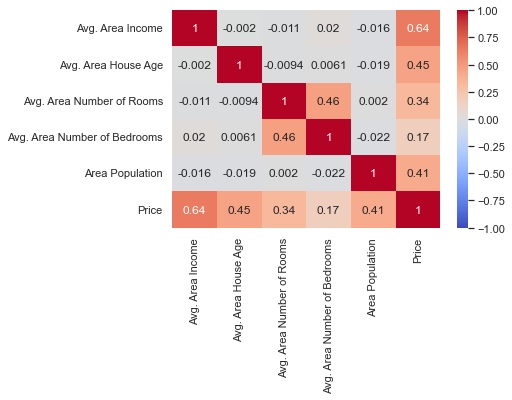

In [83]:
sns.heatmap(df_casas.corr(), cmap='coolwarm', annot=True, vmin=-1, vmax=1)

<AxesSubplot:>

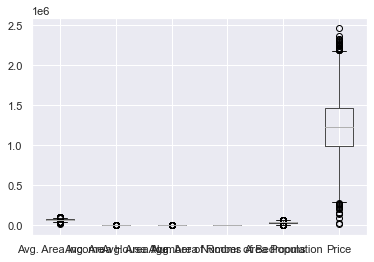

In [84]:
df_casas.boxplot()

<h1>Removendo Outliers</h1>

In [85]:
df_filtered = df_casas.copy()

for coluna in df_casas.columns[:-1]: #Parando uma coluna antes para não passar pela coluna address
    inf, sup = get_inf_sup_limits_outliers(df_casas[coluna])
    
    df_filtered = df_filtered[(df_filtered[coluna] >= inf) & (df_filtered[coluna] <= sup)]

<h1>Primeiro Modelo</h1>

In [88]:
x = df_filtered.drop(['Price','Address'], axis = 1) #Removemos a coluna address pois, por enquanto, é impossível usá-la no modelo
y = df_filtered['Price']

calc_model_metrics(x,y)

🏋🏽‍♂️ DADOS DE TREINO 🏋🏽‍♂️
MSE: 10093148052.770628
RMSE: 100464.66071594841
R²: 0.9113937799749137


🔥 DADOS DE TESTE 🔥
MSE: 10207542339.311432
RMSE: 101032.38262711333
R²: 0.9126394673276931


LinearRegression()

<h1>Segundo Modelo</h1>

In [89]:
#Criado uma coluna estado com base na coluna address para conseguir aproveitar essa informação no modelo
states = [" AL ", " AK ", " AZ ", " AR ", " CA ", " CO ", " CT ", " DE ", 
          " DC ", " FL ", " GA ", " HI ", " ID ", " IL ", " IN ", " IA ", 
          " KS ", " KY ", " LA ", " ME ", " MD ", " MA ", " MI ", " MN ", 
          " MS ", " MO ", " MT ", " NE ", " NV ", " NH ", " NJ ", " NM ", 
          " NY ", " NC ", " ND ", " OH ", " OK ", " OR ", " PA ", " RI ", 
          " SC ", " SD ", " TN ", " TX ", " UT ", " VT ", " VA ", " WA ",
          " WV ", " WI ", " WY ", " AS ", " GU ", " MP ", " PR ", " VI ",
          " MH ", " FM ", " PW ", " AA ", " AE ", " AP ", " NB ", " CM ", 
          " CZ ", " PI ", " TT "]

series_address = df_casas['Address']
list_state = []

for address in series_address:
    for state in states:
        if address.count(state) == 1:
            list_state.append(state)
            break

df_casas['State'] = list_state
df_casas

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address,State
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701...",NE
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA...",CA
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482...",WI
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820,AP
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386,AE
...,...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653,AP
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352",AA
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01...",VA
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316,AE


In [91]:
#Removendo a coluna Address agora que temos a coluna substituta State
df_casas = df_casas.drop('Address', axis = 1)

#Pegando os dummies da variável State
df_casas = pd.get_dummies(df_casas, drop_first = True)
df_casas

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,State_ AE,State_ AK,State_ AL,State_ AP,...,State_ TN,State_ TX,State_ UT,State_ VA,State_ VI,State_ VT,State_ WA,State_ WI,State_ WV,State_ WY
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
x = df_casas.drop(['Price'], axis = 1)
y = df_casas['Price']

calc_model_metrics(x,y)

🏋🏽‍♂️ DADOS DE TREINO 🏋🏽‍♂️
MSE: 10079548409.776258
RMSE: 100396.95418575336
R²: 0.9190832115980315


🔥 DADOS DE TESTE 🔥
MSE: 10408296512.352283
RMSE: 102021.05916109812
R²: 0.9165894130701219


LinearRegression()

Podemos verificar que adicionar a dimensão 'estado' ao modelo melhorou muito pouco a sua performance. Isso deve acontecer por que a variável 'Avg Area Income' já consegue sumarizar a maior parte das informações que a nova variável 'State' nos proporciona. Dessa forma optou-se por, no modelo final, não incluir a variável estado e ignorar por completo a variável 'Address'.

Portanto, o modelo escolhido para a Q2 será o primeiro modelo testado, ou seja:

In [93]:
x = df_filtered.drop(['Price','Address'], axis = 1) #Removemos a coluna address pois, por enquanto, é impossível usá-la no modelo
y = df_filtered['Price']

calc_model_metrics(x,y)

🏋🏽‍♂️ DADOS DE TREINO 🏋🏽‍♂️
MSE: 10093148052.770628
RMSE: 100464.66071594841
R²: 0.9113937799749137


🔥 DADOS DE TESTE 🔥
MSE: 10207542339.311432
RMSE: 101032.38262711333
R²: 0.9126394673276931


LinearRegression()